In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_debt = pd.read_excel('../mf/all-debt-funds-2020.xlsx', skiprows=5, index_col=0)

In [3]:
all_debt

,Category,Rating,Launch,Expense Ratio (%),Net Assets (Cr),Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020
Fund Name,,,,,,,,,,,,,,,,,,,
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,DT-DB,3,2013-01-01 00:00:00,0.19,7,2.4,2.06,1.63,3.08,0.58,2,0.33,14.14,5.81,15.29,3.04,6.8,8.8,9.62
Aditya Birla Sun Life Banking & PSU Debt Fund - Direct Plan,DT-BK & PSU,3,2013-01-01 00:00:00,0.35,16407,8.0,2.11,2.06,4.39,1.54,5.85,0.06,12.77,8.85,12.67,5.95,6.9,10.23,11.28
Aditya Birla Sun Life Corporate Bond Fund - Direct Plan,DT-CB,5,2013-01-01 00:00:00,0.3,24940,3.8,1.77,2.53,4.9,0.62,3.01,0.51,11,9,10.35,6.64,7.09,9.73,12.06
Aditya Birla Sun Life Credit Risk Fund - Direct Plan,DT-CR,3,2015-04-17 00:00:00,1.13,1634,3.8,3.27,0.62,0.59,-1.99,0.07,0.04,--,--,11.19,9.31,7.7,3,10.24
Aditya Birla Sun Life Credit Risk Fund - Segregated Portfolio 1 - Direct Plan,DT-CR,--,2019-11-25 00:00:00,--,162,1.1,--,--,--,--,--,--,--,--,--,--,--,--,-24.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTI Treasury Advantage Fund - Direct Plan,DT-LD,2,2013-01-01 00:00:00,0.38,3091,8.0,6.53,-0.18,-0.07,0.21,-0.97,0,9.47,8.91,9.05,7.21,7.41,-4.1,7.37
UTI Ultra Short Term Fund - Direct,DT-USD,2,2013-01-01 00:00:00,0.49,2055,8.0,2.27,0.38,0.2,0.55,1.42,0.01,9.44,9.11,9.46,7.32,7.61,3.85,5.83
YES Liquid Fund - Direct Plan,DT-LIQ,2,2019-01-16 00:00:00,0.18,66,2.0,--,--,--,--,--,--,--,--,--,--,--,--,3.69


In [4]:
all_debt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan to YES Ultra Short Term Fund - Direct Plan
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            362 non-null    object 
 1   Rating              362 non-null    object 
 2   Launch              362 non-null    object 
 3   Expense Ratio (%)   362 non-null    object 
 4   Net Assets (Cr)     362 non-null    object 
 5   Tenure              362 non-null    float64
 6   Standard Deviation  362 non-null    object 
 7   Sharpe Ratio        362 non-null    object 
 8   Sortino Ratio       362 non-null    object 
 9   Beta                362 non-null    object 
 10  Alpha               362 non-null    object 
 11  R-Squared           362 non-null    object 
 12  2014                362 non-null    object 
 13  2015                362 non-null    object 
 14  2016

# Data Exploration

Convert return strings to numeric values

In [5]:
all_debt['Rating'] = all_debt['Rating'].apply(pd.to_numeric, errors='coerce')

In [6]:
all_debt.iloc[:, 3:] = all_debt.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')

In [7]:
all_debt

,Category,Rating,Launch,Expense Ratio (%),Net Assets (Cr),Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020
Fund Name,,,,,,,,,,,,,,,,,,,
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,DT-DB,3.0,2013-01-01 00:00:00,0.19,7.0,2.4,2.06,1.63,3.08,0.58,2.00,0.33,14.14,5.81,15.29,3.04,6.80,8.80,9.62
Aditya Birla Sun Life Banking & PSU Debt Fund - Direct Plan,DT-BK & PSU,3.0,2013-01-01 00:00:00,0.35,16407.0,8.0,2.11,2.06,4.39,1.54,5.85,0.06,12.77,8.85,12.67,5.95,6.90,10.23,11.28
Aditya Birla Sun Life Corporate Bond Fund - Direct Plan,DT-CB,5.0,2013-01-01 00:00:00,0.30,24940.0,3.8,1.77,2.53,4.90,0.62,3.01,0.51,11.00,9.00,10.35,6.64,7.09,9.73,12.06
Aditya Birla Sun Life Credit Risk Fund - Direct Plan,DT-CR,3.0,2015-04-17 00:00:00,1.13,1634.0,3.8,3.27,0.62,0.59,-1.99,0.07,0.04,NaN,NaN,11.19,9.31,7.70,3.00,10.24
Aditya Birla Sun Life Credit Risk Fund - Segregated Portfolio 1 - Direct Plan,DT-CR,NaN,2019-11-25 00:00:00,NaN,162.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-24.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTI Treasury Advantage Fund - Direct Plan,DT-LD,2.0,2013-01-01 00:00:00,0.38,3091.0,8.0,6.53,-0.18,-0.07,0.21,-0.97,0.00,9.47,8.91,9.05,7.21,7.41,-4.10,7.37
UTI Ultra Short Term Fund - Direct,DT-USD,2.0,2013-01-01 00:00:00,0.49,2055.0,8.0,2.27,0.38,0.20,0.55,1.42,0.01,9.44,9.11,9.46,7.32,7.61,3.85,5.83
YES Liquid Fund - Direct Plan,DT-LIQ,2.0,2019-01-16 00:00:00,0.18,66.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.69


In [8]:
all_debt.describe()

,Rating,Expense Ratio (%),Net Assets (Cr),Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020
count,279.000000,334.000000,344.000000,362.000000,258.000000,258.000000,257.000000,258.000000,258.000000,258.000000,228.000000,244.000000,252.000000,254.000000,258.000000,277.000000,322.000000
mean,3.032258,0.385868,4144.866279,4.264641,3.032248,1.604380,2.897782,0.514767,1.359961,0.324574,11.754254,8.277213,10.762579,6.137717,6.777093,7.099134,6.600062
std,1.097266,0.305319,7906.734292,2.822058,3.560244,1.222257,2.301469,2.623337,5.337716,0.296372,3.073936,1.364439,2.921300,1.807595,1.792844,5.876744,7.172424
min,1.000000,0.040000,1.000000,0.000000,0.330000,-1.260000,-1.430000,-26.880000,-58.760000,0.000000,7.840000,-1.000000,6.480000,-0.240000,-7.710000,-45.090000,-44.270000
25%,2.000000,0.180000,133.750000,1.500000,0.922500,0.767500,1.020000,0.562500,0.520000,0.050000,9.280000,7.650000,8.475000,5.685000,6.190000,6.480000,4.260000
50%,3.000000,0.300000,852.500000,4.000000,2.320000,1.630000,3.010000,0.890000,2.100000,0.260000,10.635000,8.495000,10.010000,6.700000,7.130000,8.350000,7.615000
75%,4.000000,0.487500,3967.000000,7.300000,3.812500,2.457500,4.140000,1.220000,3.447500,0.510000,13.697500,8.972500,12.412500,7.090000,7.580000,10.230000,10.787500
max,5.000000,1.610000,68508.000000,8.000000,39.620000,5.370000,9.710000,5.230000,10.590000,0.930000,21.650000,11.840000,18.890000,9.790000,11.770000,14.300000,26.910000


In [9]:
all_debt['Category'].unique()

array(['DT-DB', 'DT-BK & PSU', 'DT-CB', 'DT-CR', 'DT-Floater', 'DT-GL',
       'DT-M to LD', 'DT-LIQ', 'DT-LD', 'DT-MD', 'DT-MM', 'DT-OVERNHT',
       'DT-USD', 'DT-SD', 'DT-LONG D', 'DT-Gilt 10Y CD'], dtype=object)

In [10]:
labels = ['DT-OVERNHT', 'DT-LIQ', 'DT-USD', 'DT-LD', 'DT-MM', 'DT-SD', 'DT-MD', 'DT-M to LD', 'DT-LONG D',
          'DT-DB', 'DT-CB', 'DT-CR', 'DT-BK & PSU', 'DT-GL', 'DT-Gilt 10Y CD', 'DT-Floater']

In [11]:
all_debt.isnull().sum()

Category                0
Rating                 83
Launch                  0
Expense Ratio (%)      28
Net Assets (Cr)        18
Tenure                  0
Standard Deviation    104
Sharpe Ratio          104
Sortino Ratio         105
Beta                  104
Alpha                 104
R-Squared             104
2014                  134
2015                  118
2016                  110
2017                  108
2018                  104
2019                   85
2020                   40
dtype: int64

In [12]:
all_debt.groupby('Category').count()

,Rating,Launch,Expense Ratio (%),Net Assets (Cr),Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020
Category,,,,,,,,,,,,,,,,,,
DT-BK & PSU,18,23,21,22,23,17,17,17,17,17,17,13,16,17,17,17,17,19
DT-CB,20,22,21,22,22,15,15,15,15,15,15,11,13,13,14,15,18,21
DT-CR,17,29,20,22,29,17,17,17,17,17,17,8,13,16,16,17,18,20
DT-DB,26,32,29,30,32,26,26,26,26,26,26,24,24,25,25,26,27,28
DT-Floater,0,8,8,8,8,5,5,5,5,5,5,5,5,5,5,5,6,7
DT-GL,21,21,21,21,21,21,21,21,21,21,21,20,21,21,21,21,21,21
DT-Gilt 10Y CD,0,4,4,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4
DT-LD,25,29,27,27,29,26,26,26,26,26,26,24,24,25,25,26,26,27
DT-LIQ,38,38,38,38,38,34,34,33,34,34,34,33,33,33,34,34,36,38


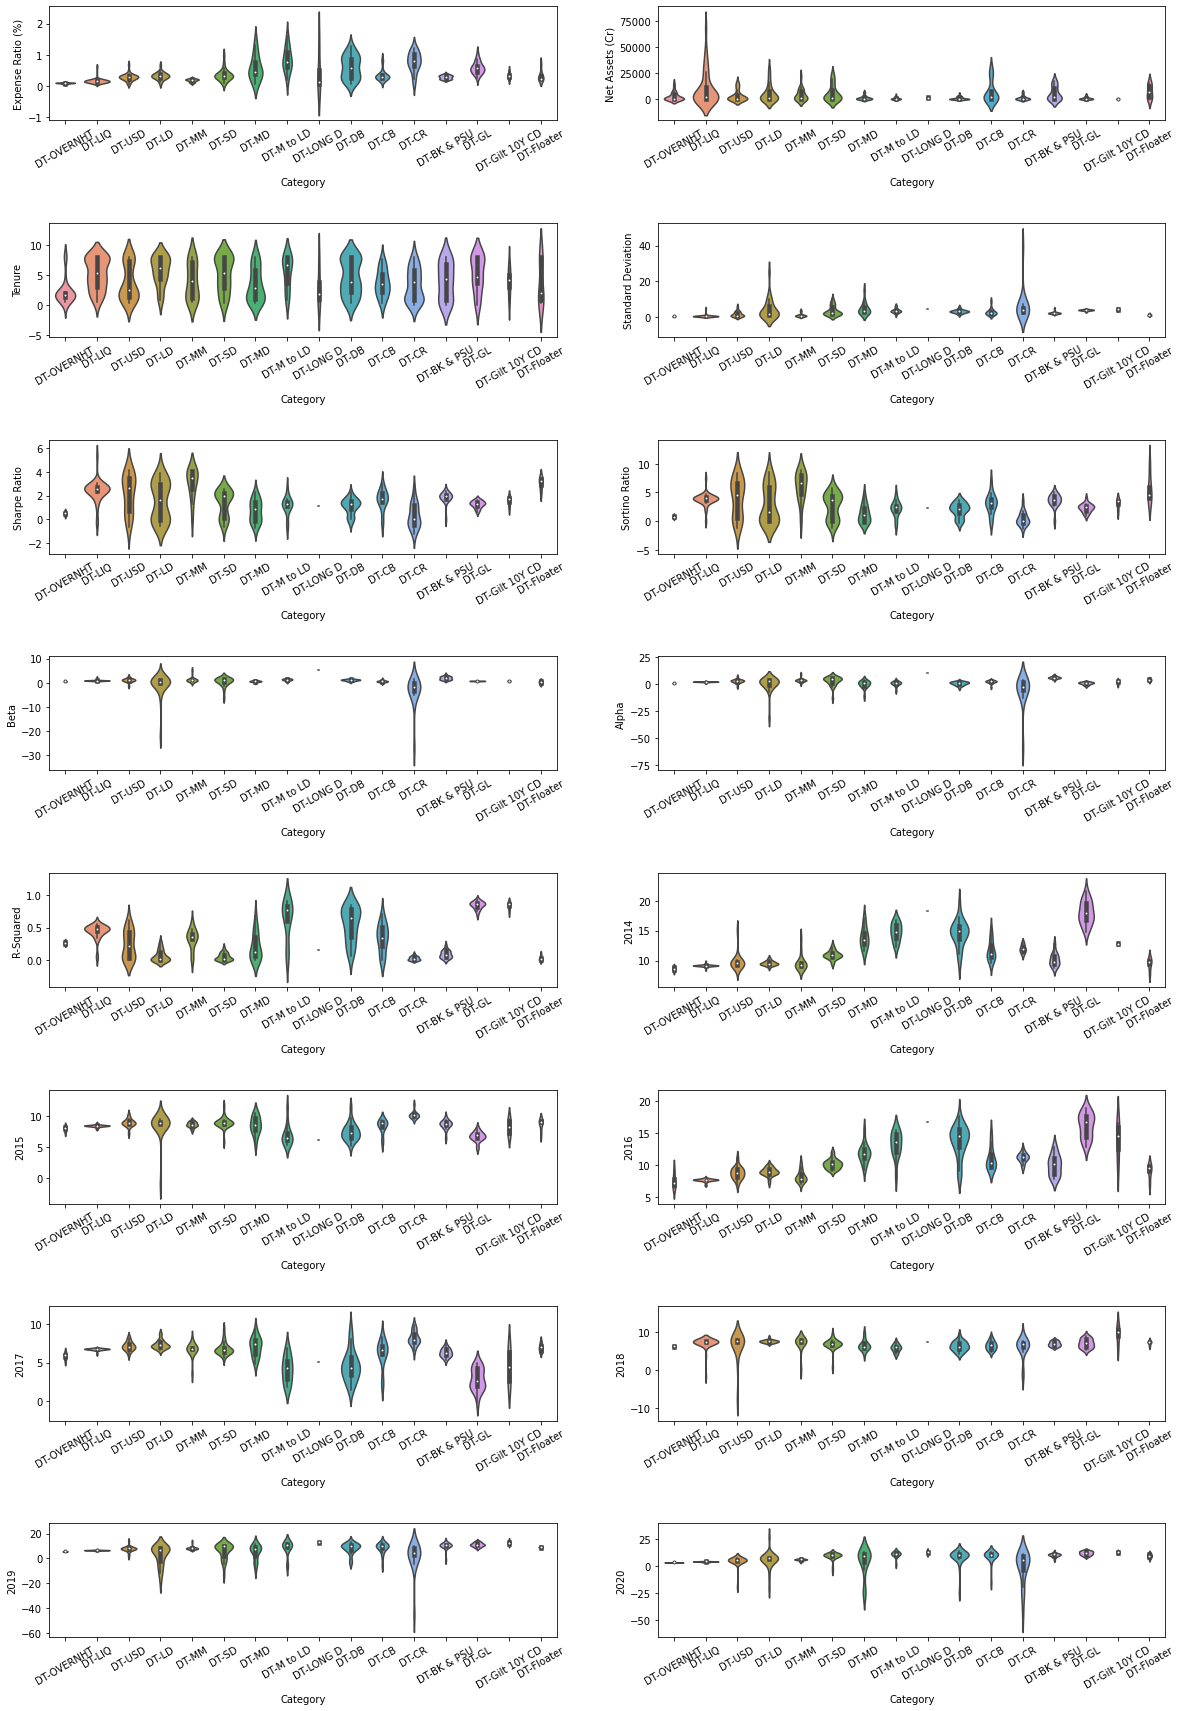

In [26]:
fig, axes = plt.subplots(8,2,figsize=(20,30))
for i, ax in enumerate(axes.ravel()):
    sns.violinplot(data=all_debt, x='Category', y=all_debt.iloc[:, i+3], scale='count', order=labels, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.subplots_adjust(hspace = 0.9)

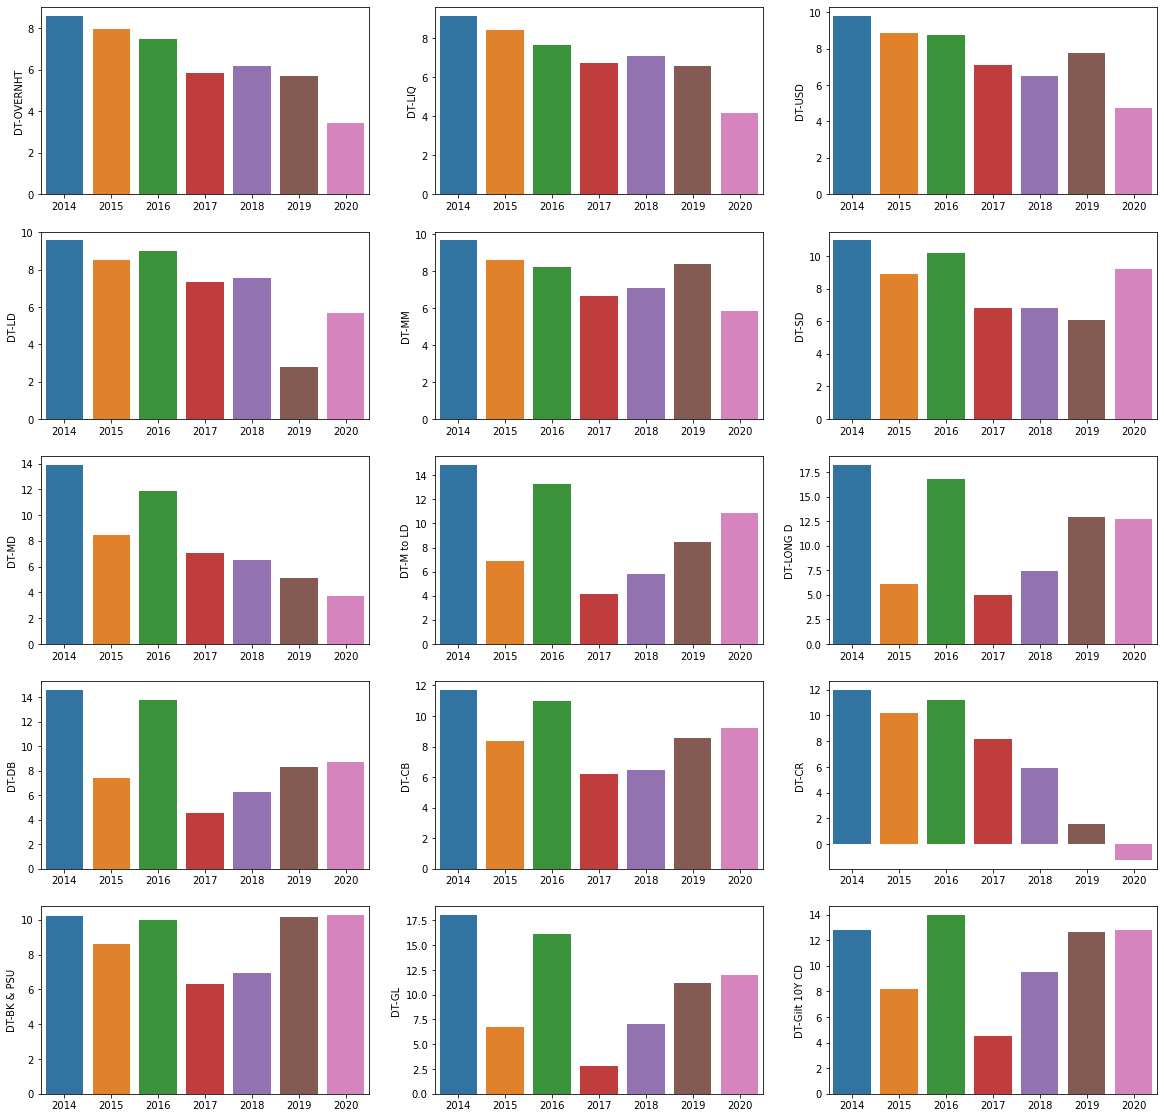

In [22]:
df = all_debt.groupby('Category').mean().loc[labels].swapaxes("index", "columns").iloc[10:, :]
fig, axes = plt.subplots(5,3,figsize=(20,20))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=df, x=df.index, y=df.iloc[:, i], ax=ax)

In [29]:
iqr = all_debt.groupby('Category').quantile(.75) - all_debt.groupby('Category').quantile(.25)
iqr.sort_values(by=2020)

,Rating,Expense Ratio (%),Net Assets (Cr),Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020
Category,,,,,,,,,,,,,,,,,
DT-OVERNHT,2.00,0.0200,4449.25,0.575,0.0125,0.1550,0.2300,0.0600,0.0400,0.0350,0.4450,0.3775,0.955,0.3075,0.1625,0.0150,0.0850
DT-LIQ,2.00,0.0750,11174.00,5.050,0.0200,0.3200,0.4200,0.0775,0.2000,0.0675,0.0800,0.1100,0.080,0.0700,0.1075,0.2200,0.3950
DT-MM,2.00,0.0650,7469.00,6.000,0.2100,1.5500,3.2900,0.2050,0.5250,0.0750,0.3800,0.5350,0.900,0.2000,0.4000,0.4000,0.5550
DT-USD,2.00,0.1000,3873.00,6.000,1.8475,2.7975,5.9875,0.6950,1.4950,0.3900,0.4450,0.4800,1.335,0.6000,0.4825,0.8775,0.9975
DT-LONG D,NaN,0.4650,450.75,2.825,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.1650,1.1100
DT-CB,2.00,0.0700,7442.00,3.075,1.0450,0.7150,1.3600,0.4050,0.7300,0.2900,1.9850,0.8500,1.990,1.1125,1.6250,2.7850,1.3700
DT-LD,2.00,0.1200,7397.50,3.600,5.0050,3.0950,6.0475,1.0825,4.9075,0.1175,0.4325,0.4250,0.680,0.6200,0.4375,10.8250,1.3850
DT-SD,1.75,0.1275,8254.50,5.100,3.7300,2.1100,4.3500,1.5900,4.9700,0.0700,0.6300,0.3300,0.930,0.5900,0.6000,8.3375,1.4550
DT-Gilt 10Y CD,NaN,0.0850,212.75,1.950,0.3450,0.2925,0.4750,0.0725,1.1275,0.0300,0.1050,2.0300,3.410,3.8200,1.6800,1.3800,1.4825


# Analysis of one Category type

In [26]:
df = all_debt[all_debt['Category'] == 'HY-AH'].iloc[:, -7:]
df

,2014,2015,2016,2017,2018,2019,2020
Fund Name,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,50.01,4.39,10.25,27.55,-3.87,5.55,12.56
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.25
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,15.86,16.65
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,18.36
Baroda Hybrid Equity Fund - Direct Plan,30.31,4.00,5.63,32.97,-6.11,4.44,17.82
BNP Paribas Substantial Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,1.98,17.97,16.78
BOI AXA Mid & Small Cap Equity & Debt Fund - Direct Plan,NaN,NaN,NaN,48.40,-13.38,-3.81,32.23
Canara Robeco Equity Hybrid Fund - Direct Plan,45.94,6.79,4.70,26.83,2.61,12.97,21.07
DSP Equity & Bond Fund - Direct Plan,45.85,5.58,9.25,29.16,-4.11,15.34,18.18


In [28]:
all_debt[all_debt['Category'] == 'HY-AH'].iloc[:, 6:12]

,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared
Fund Name,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,18.33,0.08,0.08,0.97,-5.53,0.94
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Baroda Hybrid Equity Fund - Direct Plan,16.85,0.09,0.10,0.88,-4.77,0.91
BNP Paribas Substantial Equity Hybrid Fund - Direct Plan,15.09,0.51,0.60,0.80,2.10,0.93
BOI AXA Mid & Small Cap Equity & Debt Fund - Direct Plan,21.38,0.04,0.04,0.96,-6.07,0.67
Canara Robeco Equity Hybrid Fund - Direct Plan,14.62,0.52,0.60,0.77,2.14,0.94
DSP Equity & Bond Fund - Direct Plan,18.19,0.32,0.35,0.93,-0.75,0.88


<AxesSubplot:>

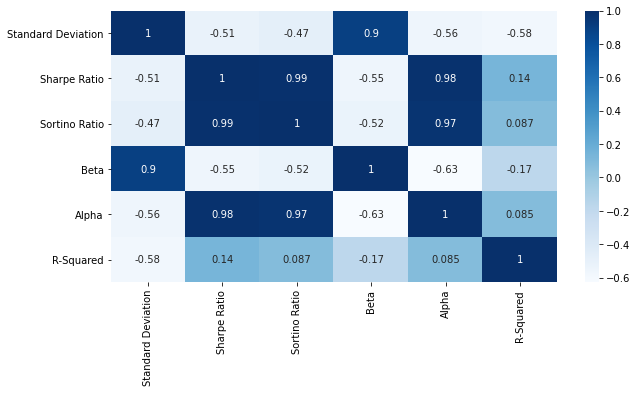

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(all_debt[all_debt['Category'] == 'HY-AH'].iloc[:, 6:12].corr(), annot=True, cmap='Blues')

File names

1. equity-large-and-midcap.xlsx
2. equity-mid-cap.xlsx
3. equity-multi-cap.xlsx
4. equity-small-cap.xlsx
5. hybrid-aggressive-hybrid.xlsx

In [18]:
#df = pd.read_excel('../mf/equity-mid-cap.xlsx', skiprows=5, index_col=0, sheet_name=1)

In [29]:
df.head()

,2014,2015,2016,2017,2018,2019,2020
Fund Name,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,50.01,4.39,10.25,27.55,-3.87,5.55,12.56
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.25
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,15.86,16.65
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,18.36
Baroda Hybrid Equity Fund - Direct Plan,30.31,4.00,5.63,32.97,-6.11,4.44,17.82


In [30]:
df.shape

(47, 7)

In [31]:
df.describe()

,2014,2015,2016,2017,2018,2019,2020
count,26.000000,27.000000,28.000000,31.000000,33.000000,39.000000,43.000000
mean,41.716923,3.755185,7.317857,28.102258,-1.576364,9.294615,15.728372
std,9.393542,3.745323,3.581591,6.105233,3.474869,5.386090,6.644705
min,24.640000,-6.140000,0.610000,18.550000,-13.380000,-6.840000,-4.550000
25%,34.600000,2.495000,4.940000,24.365000,-3.670000,6.710000,12.840000
50%,44.045000,3.740000,7.755000,26.830000,-0.990000,9.940000,15.380000
75%,47.627500,5.820000,9.620000,30.555000,0.890000,13.145000,17.800000
max,56.830000,11.060000,15.230000,48.400000,4.590000,17.970000,37.280000


number of mutual funds in each year

In [32]:
df.count()

2014    26
2015    27
2016    28
2017    31
2018    33
2019    39
2020    43
dtype: int64

number of years each mutual fund is operating

In [33]:
df.count(axis=1)

Fund Name
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan                 7
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan         1
Axis Equity Hybrid Fund - Direct Plan                                      2
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan               1
Baroda Hybrid Equity Fund - Direct Plan                                    7
BNP Paribas Substantial Equity Hybrid Fund - Direct Plan                   3
BOI AXA Mid & Small Cap Equity & Debt Fund - Direct Plan                   4
Canara Robeco Equity Hybrid Fund - Direct Plan                             7
DSP Equity & Bond Fund - Direct Plan                                       7
Edelweiss Aggressive Hybrid Fund - Direct Plan                             7
Essel Equity Hybrid Fund - Direct Plan                                     2
Franklin India Equity Hybrid Fund - Direct Plan                            7
Franklin India Life Stage Fund of Funds 20s - Direct Plan         

average return of all funds by year

In [34]:
df.mean()

2014    41.716923
2015     3.755185
2016     7.317857
2017    28.102258
2018    -1.576364
2019     9.294615
2020    15.728372
dtype: float64

percentage of funds having positive return by year

In [35]:
(df>0).sum() / df.count() * 100

2014    100.000000
2015     88.888889
2016    100.000000
2017    100.000000
2018     30.303030
2019     94.871795
2020     97.674419
dtype: float64

Select funds with minimum years of history and from recent years

In [36]:
dfd = df.iloc[:, :].dropna(thresh=3)
dfd.shape

(33, 7)

In [37]:
dfd.count(axis=1)

Fund Name
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan         7
Baroda Hybrid Equity Fund - Direct Plan                            7
BNP Paribas Substantial Equity Hybrid Fund - Direct Plan           3
BOI AXA Mid & Small Cap Equity & Debt Fund - Direct Plan           4
Canara Robeco Equity Hybrid Fund - Direct Plan                     7
DSP Equity & Bond Fund - Direct Plan                               7
Edelweiss Aggressive Hybrid Fund - Direct Plan                     7
Franklin India Equity Hybrid Fund - Direct Plan                    7
Franklin India Life Stage Fund of Funds 20s - Direct Plan          7
HDFC Children's Gift Fund - Direct Plan                            7
HDFC Hybrid Equity Fund - Direct Plan                              7
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan    4
HSBC Managed Solutions India - Growth - Direct Plan                6
ICICI Prudential Child Care Fund - Gift Plan - Direct Plan         7
ICICI Prudential Equity 

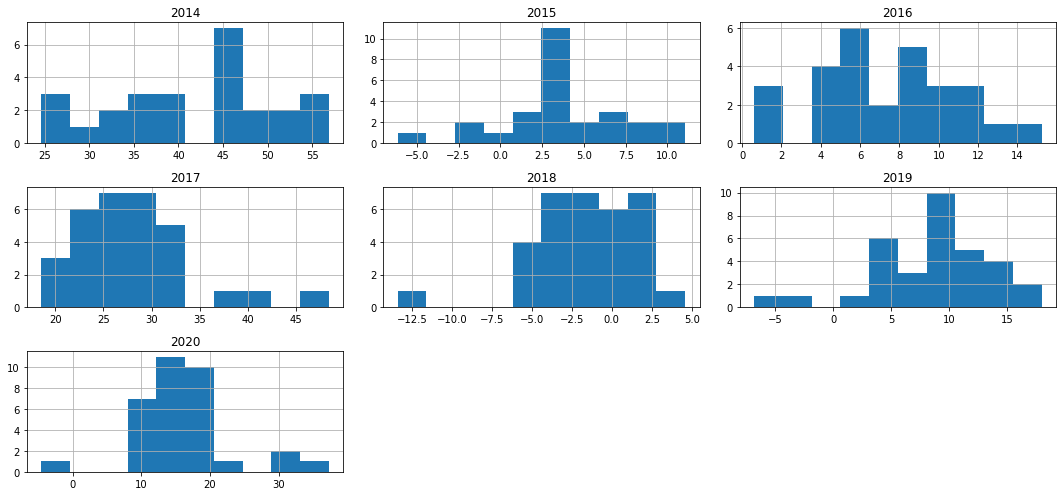

In [38]:
dfd.hist(figsize=(15,7))
plt.tight_layout()
plt.show()

# CAGR

Cumulative Annual Growth Rate

In [39]:
def total_return(x):
    s = 1
    for i in x:
        if not np.isnan(i):
            s *= (1 + i/100)
    return s

In [40]:
cagr = (dfd.apply(lambda row : total_return(row), axis=1)**(1/dfd.count(axis=1)) - 1).sort_values(ascending=False)
cagr.name = 'cagr'

In [41]:
cagr.sort_values(ascending=False)

Fund Name
Tata Retirement Savings Fund - Moderate Plan - Direct Plan         0.184420
Quant Absolute Fund - Direct Plan                                  0.174804
Canara Robeco Equity Hybrid Fund - Direct Plan                     0.164533
DSP Equity & Bond Fund - Direct Plan                               0.160813
SBI Equity Hybrid Fund - Direct Plan                               0.157024
HDFC Hybrid Equity Fund - Direct Plan                              0.155769
HDFC Children's Gift Fund - Direct Plan                            0.153571
L&T Hybrid Equity Fund - Direct Plan                               0.149312
ICICI Prudential Equity & Debt Fund - Direct Plan                  0.149013
Principal Hybrid Equity Fund - Direct Plan                         0.148140
Franklin India Equity Hybrid Fund - Direct Plan                    0.147771
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan    0.143195
Mirae Asset Hybrid Equity Fund - Direct Plan                       0.142490
IC

# Ergodic Sum

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
values = dfd.to_numpy()

In [44]:
scaled = StandardScaler(with_mean=False, with_std=True).fit_transform(values)

In [45]:
scaled = np.round(scaled, 3)

In [46]:
scaled_dfd = pd.DataFrame(scaled, index=dfd.index, columns=dfd.columns)

In [47]:
scaled_dfd

,2014,2015,2016,2017,2018,2019,2020
Fund Name,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,5.429,1.194,2.914,4.587,-1.131,1.048,1.726
Baroda Hybrid Equity Fund - Direct Plan,3.291,1.088,1.601,5.490,-1.786,0.838,2.448
BNP Paribas Substantial Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,0.579,3.392,2.305
BOI AXA Mid & Small Cap Equity & Debt Fund - Direct Plan,NaN,NaN,NaN,8.059,-3.910,-0.719,4.428
Canara Robeco Equity Hybrid Fund - Direct Plan,4.987,1.847,1.336,4.467,0.763,2.448,2.895
DSP Equity & Bond Fund - Direct Plan,4.978,1.518,2.630,4.855,-1.201,2.896,2.498
Edelweiss Aggressive Hybrid Fund - Direct Plan,4.229,0.743,0.173,4.456,0.222,2.290,1.992
Franklin India Equity Hybrid Fund - Direct Plan,5.203,1.649,2.624,3.790,-0.120,1.716,2.035
Franklin India Life Stage Fund of Funds 20s - Direct Plan,4.298,1.018,2.181,4.304,-1.073,0.866,1.099


In [48]:
(scaled_dfd>0).sum()/scaled_dfd.count()

2014    1.000000
2015    0.888889
2016    1.000000
2017    1.000000
2018    0.303030
2019    0.939394
2020    0.969697
dtype: float64

In [49]:
ergodic = (scaled_dfd[scaled_dfd>0].sum(axis=1).add(2*scaled_dfd[scaled_dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False)
ergodic.name = 'ergodic'
ergodic

Fund Name
Tata Retirement Savings Fund - Moderate Plan - Direct Plan         2.939143
Mirae Asset Hybrid Equity Fund - Direct Plan                       2.724200
Canara Robeco Equity Hybrid Fund - Direct Plan                     2.677571
Quant Absolute Fund - Direct Plan                                  2.652286
SBI Equity Hybrid Fund - Direct Plan                               2.598714
ICICI Prudential Equity & Debt Fund - Direct Plan                  2.500429
HDFC Children's Gift Fund - Direct Plan                            2.473429
Principal Hybrid Equity Fund - Direct Plan                         2.469429
HDFC Hybrid Equity Fund - Direct Plan                              2.465143
DSP Equity & Bond Fund - Direct Plan                               2.424714
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan    2.419250
Franklin India Equity Hybrid Fund - Direct Plan                    2.396714
L&T Hybrid Equity Fund - Direct Plan                               2.317857
IC

without standardizing

In [50]:
(dfd[dfd>0].sum(axis=1).add(2*dfd[dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False).head(10)

Fund Name
Tata Retirement Savings Fund - Moderate Plan - Direct Plan    19.551429
Quant Absolute Fund - Direct Plan                             18.874286
Canara Robeco Equity Hybrid Fund - Direct Plan                17.272857
SBI Equity Hybrid Fund - Direct Plan                          16.494286
HDFC Hybrid Equity Fund - Direct Plan                         16.485714
DSP Equity & Bond Fund - Direct Plan                          16.448571
HDFC Children's Gift Fund - Direct Plan                       16.247143
ICICI Prudential Equity & Debt Fund - Direct Plan             15.702857
Principal Hybrid Equity Fund - Direct Plan                    15.635714
Franklin India Equity Hybrid Fund - Direct Plan               15.580000
dtype: float64

# Average Ranking

Ranking of each fund in each year - bigger number is better

In [93]:
dfdr = dfd.rank(axis=0, ascending = True)
dfdr

,2014,2015,2016,2017,2018,2019,2020
Fund Name,,,,,,,
Aditya Birla Sun Life Mid Cap Fund - Direct Plan,9.0,15.0,15.0,15.0,3.0,1.0,3.0
Axis Midcap Fund - Direct Plan,12.0,2.0,3.0,10.0,22.0,22.0,16.0
Baroda Midcap Fund - Direct Plan,3.0,1.0,1.0,12.0,8.0,4.0,19.0
BNP Paribas Midcap Fund - Direct Plan,6.0,20.0,6.0,19.0,2.0,15.0,11.0
DSP Midcap Fund - Direct Plan,7.0,8.0,20.0,5.0,17.0,20.0,10.0
Edelweiss Mid Cap Fund - Direct Plan,17.0,14.0,8.0,20.0,6.0,16.0,17.0
Franklin India Prima Fund - Direct Plan,14.0,9.0,16.0,6.0,18.0,12.0,4.0
HDFC Mid-Cap Opportunities Fund - Direct Plan,11.0,4.0,21.0,8.0,15.0,9.0,7.0
ICICI Prudential Midcap Fund - Direct Plan,18.0,3.0,12.0,11.0,16.0,5.0,5.0


Percentile ranking of funds

In [35]:
dfdr = dfdr/dfdr.count()*100
dfdr.head()

,2014,2015,2016,2017,2018,2019,2020
Fund Name,,,,,,,
Aditya Birla Sun Life Mid Cap Fund - Direct Plan,45.0,71.428571,71.428571,71.428571,13.636364,4.545455,13.636364
Axis Midcap Fund - Direct Plan,60.0,9.523810,14.285714,47.619048,100.000000,100.000000,72.727273
Baroda Midcap Fund - Direct Plan,15.0,4.761905,4.761905,57.142857,36.363636,18.181818,86.363636
BNP Paribas Midcap Fund - Direct Plan,30.0,95.238095,28.571429,90.476190,9.090909,68.181818,50.000000
DSP Midcap Fund - Direct Plan,35.0,38.095238,95.238095,23.809524,77.272727,90.909091,45.454545


## Funds in top percentile

In [36]:
top_percentile = (dfdr[dfdr>=50].count(axis=1)/dfdr.count(axis=1)).sort_values(ascending=False)

In [37]:
top_percentile.name = 'top_percentile'

In [38]:
top_percentile.head(10)

Fund Name
Invesco India Mid Cap Fund - Direct Plan        0.857143
Kotak Emerging Equity Fund - Direct Plan        0.857143
Tata Midcap Growth Fund - Direct Plan           0.714286
Edelweiss Mid Cap Fund - Direct Plan            0.714286
L&T Midcap Fund - Direct Plan                   0.714286
Taurus Discovery (Midcap) Fund - Direct Plan    0.714286
Motilal Oswal Midcap 30 Fund - Direct Plan      0.666667
ICICI Prudential Midcap Fund - Direct Plan      0.571429
Axis Midcap Fund - Direct Plan                  0.571429
BNP Paribas Midcap Fund - Direct Plan           0.571429
Name: top_percentile, dtype: float64

## Average percentile rank

In [39]:
dfdr['rank'] = dfdr.sum(axis=1)/dfdr.count(axis=1)/100

In [40]:
dfdr.sort_values(by='rank', ascending=False)

,2014,2015,2016,2017,2018,2019,2020,rank
Fund Name,,,,,,,,
Kotak Emerging Equity Fund - Direct Plan,95.0,61.904762,90.476190,61.904762,59.090909,86.363636,40.909091,0.708071
L&T Midcap Fund - Direct Plan,80.0,80.952381,80.952381,100.000000,54.545455,45.454545,27.272727,0.670254
Edelweiss Mid Cap Fund - Direct Plan,85.0,66.666667,38.095238,95.238095,27.272727,72.727273,77.272727,0.660390
Invesco India Mid Cap Fund - Direct Plan,65.0,52.380952,33.333333,80.952381,90.909091,63.636364,68.181818,0.649134
Tata Midcap Growth Fund - Direct Plan,75.0,85.714286,19.047619,85.714286,45.454545,81.818182,59.090909,0.645485
DSP Midcap Fund - Direct Plan,35.0,38.095238,95.238095,23.809524,77.272727,90.909091,45.454545,0.579685
Axis Midcap Fund - Direct Plan,60.0,9.523810,14.285714,47.619048,100.000000,100.000000,72.727273,0.577365
Taurus Discovery (Midcap) Fund - Direct Plan,25.0,57.142857,42.857143,76.190476,86.363636,50.000000,63.636364,0.573129
UTI Mid Cap Fund - Direct Plan,100.0,33.333333,52.380952,42.857143,31.818182,31.818182,90.909091,0.547310


# More than mean returns

In [41]:
dfd.mean()

2014    71.664500
2015     8.642381
2016     4.842381
2017    43.784762
2018   -10.544091
2019     4.055455
2020    25.974545
dtype: float64

Excess return of fund (fund return - mean return in year)

In [42]:
dfdm = dfd-dfd.mean()
dfdm

,2014,2015,2016,2017,2018,2019,2020
Fund Name,,,,,,,
Aditya Birla Sun Life Mid Cap Fund - Direct Plan,2.4355,2.627619,1.697619,2.465238,-4.685909,-6.915455,-9.304545
Axis Midcap Fund - Direct Plan,7.8855,-6.602381,-6.762381,-0.184762,15.134091,8.744545,1.795455
Baroda Midcap Fund - Direct Plan,-25.5945,-23.692381,-8.722381,1.035238,-3.145909,-3.945455,6.855455
BNP Paribas Midcap Fund - Direct Plan,-4.3945,8.157619,-4.612381,7.575238,-5.475909,2.664545,-1.044545
DSP Midcap Fund - Direct Plan,0.0055,-0.692381,7.477619,-2.754762,1.164091,6.204545,-1.194545
Edelweiss Mid Cap Fund - Direct Plan,13.9155,2.027619,-1.792381,9.325238,-3.945909,2.784545,2.475455
Franklin India Prima Fund - Direct Plan,8.5155,-0.402381,4.697619,-2.644762,2.114091,0.454545,-7.214545
HDFC Mid-Cap Opportunities Fund - Direct Plan,6.1855,-1.822381,7.547619,-0.724762,0.404091,-3.135455,-3.394545
ICICI Prudential Midcap Fund - Direct Plan,16.8455,-2.562381,0.887619,0.695238,0.844091,-3.675455,-5.764545


## alpha

In [44]:
alpha = (dfdm.sum(axis=1)/dfdm.count(axis=1)).sort_values(ascending=False)
alpha.name = 'alpha'
alpha

Fund Name
Kotak Emerging Equity Fund - Direct Plan              4.350010
Edelweiss Mid Cap Fund - Direct Plan                  3.541438
L&T Midcap Fund - Direct Plan                         3.010010
Axis Midcap Fund - Direct Plan                        2.858581
UTI Mid Cap Fund - Direct Plan                        2.715724
Invesco India Mid Cap Fund - Direct Plan              2.492867
Tata Midcap Growth Fund - Direct Plan                 2.270010
DSP Midcap Fund - Direct Plan                         1.458581
ICICI Prudential Midcap Fund - Direct Plan            1.038581
Franklin India Prima Fund - Direct Plan               0.788581
HDFC Mid-Cap Opportunities Fund - Direct Plan         0.722867
BNP Paribas Midcap Fund - Direct Plan                 0.410010
SBI Magnum Midcap Fund - Direct Plan                 -0.341419
Taurus Discovery (Midcap) Fund - Direct Plan         -0.927133
Sundaram Mid Cap Fund - Direct Plan                  -1.179990
Motilal Oswal Midcap 30 Fund - Direct Plan   

Funds consistently given positive excess returns

In [45]:
dfdm['consistency'] = dfdm[dfdm > 0].count(axis=1)*100/dfdm.count(axis=1)/100

In [46]:
dfdm.sort_values(by='consistency', ascending=False).head(10)

,2014,2015,2016,2017,2018,2019,2020,consistency
Fund Name,,,,,,,,
Kotak Emerging Equity Fund - Direct Plan,17.1955,1.337619,7.157619,1.195238,-0.115909,6.184545,-2.504545,0.714286
Edelweiss Mid Cap Fund - Direct Plan,13.9155,2.027619,-1.792381,9.325238,-3.945909,2.784545,2.475455,0.714286
Invesco India Mid Cap Fund - Direct Plan,8.0255,-0.132381,-1.992381,3.075238,6.954091,1.364545,0.155455,0.714286
ICICI Prudential Midcap Fund - Direct Plan,16.8455,-2.562381,0.887619,0.695238,0.844091,-3.675455,-5.764545,0.571429
Tata Midcap Growth Fund - Direct Plan,9.8255,3.137619,-6.432381,7.165238,-1.635909,3.924545,-0.094545,0.571429
SBI Magnum Midcap Fund - Direct Plan,1.4455,7.467619,1.407619,-8.764762,-6.415909,-3.165455,5.635455,0.571429
L&T Midcap Fund - Direct Plan,11.4355,3.087619,5.827619,9.875238,-0.625909,-3.025455,-5.504545,0.571429
Axis Midcap Fund - Direct Plan,7.8855,-6.602381,-6.762381,-0.184762,15.134091,8.744545,1.795455,0.571429
Aditya Birla Sun Life Mid Cap Fund - Direct Plan,2.4355,2.627619,1.697619,2.465238,-4.685909,-6.915455,-9.304545,0.571429


# All Metrics

In [47]:
all_metrics = (dfdm['consistency'].to_frame().join(top_percentile).join(dfdr['rank']).join(cagr).join(ergodic).join(alpha)).sort_values(by=['ergodic'], ascending=False)

In [48]:
all_metrics['Rating'] = all_debt.loc[all_metrics.index]['Rating']

In [49]:
all_metrics

,consistency,top_percentile,rank,cagr,ergodic,alpha,Rating
Fund Name,,,,,,,
Axis Midcap Fund - Direct Plan,0.571429,0.571429,0.577365,0.214155,2.659143,2.858581,5.0
Kotak Emerging Equity Fund - Direct Plan,0.714286,0.857143,0.708071,0.223379,2.505857,4.350010,4.0
Invesco India Mid Cap Fund - Direct Plan,0.714286,0.857143,0.649134,0.208992,2.473000,2.492867,4.0
DSP Midcap Fund - Direct Plan,0.571429,0.428571,0.579685,0.203639,2.320143,1.458581,4.0
L&T Midcap Fund - Direct Plan,0.571429,0.714286,0.670254,0.208345,2.295714,3.010010,3.0
Edelweiss Mid Cap Fund - Direct Plan,0.714286,0.714286,0.660390,0.210239,2.193429,3.541438,3.0
Franklin India Prima Fund - Direct Plan,0.571429,0.571429,0.531664,0.192378,2.098857,0.788581,3.0
Tata Midcap Growth Fund - Direct Plan,0.571429,0.714286,0.645485,0.200677,2.083429,2.270010,3.0
Taurus Discovery (Midcap) Fund - Direct Plan,0.428571,0.714286,0.573129,0.181130,2.063714,-0.927133,4.0


In [50]:
all_debt.loc[all_metrics.index]

,Category,Rating,Launch,Expense Ratio (%),Net Assets (Cr),Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020
Fund Name,,,,,,,,,,,,,,,,,,,
Axis Midcap Fund - Direct Plan,EQ-MC,5.0,2013-01-01,0.55,7878.0,4.1,19.98,0.55,0.62,0.72,9.30,0.93,79.55,2.04,-1.92,43.60,4.59,12.80,27.77
Kotak Emerging Equity Fund - Direct Plan,EQ-MC,4.0,2013-01-01,0.61,8654.0,8.0,25.30,0.20,0.21,0.93,2.90,0.97,88.86,9.98,12.00,44.98,-10.66,10.24,23.47
Invesco India Mid Cap Fund - Direct Plan,EQ-MC,4.0,2013-01-01,0.73,1142.0,2.8,23.30,0.27,0.30,0.85,4.32,0.95,79.69,8.51,2.85,46.86,-3.59,5.42,26.13
DSP Midcap Fund - Direct Plan,EQ-MC,4.0,2013-01-01,0.89,9467.0,8.0,23.09,0.23,0.26,0.84,3.31,0.96,71.67,7.95,12.32,41.03,-9.38,10.26,24.78
L&T Midcap Fund - Direct Plan,EQ-MC,3.0,2013-01-01,0.77,6180.0,4.5,23.91,0.03,0.04,0.88,-1.30,0.98,83.10,11.73,10.67,53.66,-11.17,1.03,20.47
Edelweiss Mid Cap Fund - Direct Plan,EQ-MC,3.0,2013-01-01,0.74,1023.0,8.0,25.37,0.15,0.17,0.93,1.67,0.96,85.58,10.67,3.05,53.11,-14.49,6.84,28.45
Franklin India Prima Fund - Direct Plan,EQ-MC,3.0,2013-01-01,1.06,7026.0,8.0,24.08,0.10,0.12,0.88,0.41,0.96,80.18,8.24,9.54,41.14,-8.43,4.51,18.76
Tata Midcap Growth Fund - Direct Plan,EQ-MC,3.0,2013-01-01,1.17,971.0,3.5,25.30,0.18,0.20,0.92,2.23,0.96,81.49,11.78,-1.59,50.95,-12.18,7.98,25.88
Taurus Discovery (Midcap) Fund - Direct Plan,EQ-MC,4.0,2013-01-01,2.22,59.0,3.5,22.19,0.18,0.20,0.81,1.96,0.96,61.30,8.58,3.84,46.63,-6.53,2.11,26.00


<AxesSubplot:>

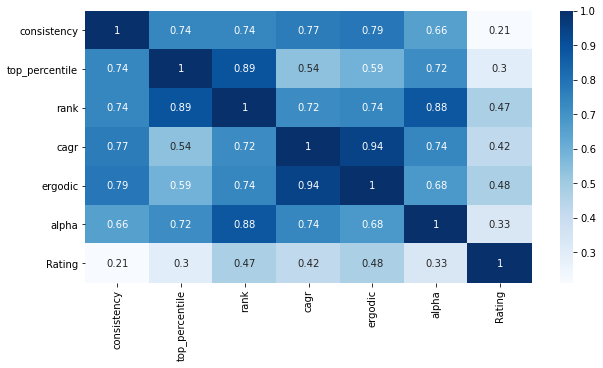

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(all_metrics.corr(), annot=True, cmap='Blues')

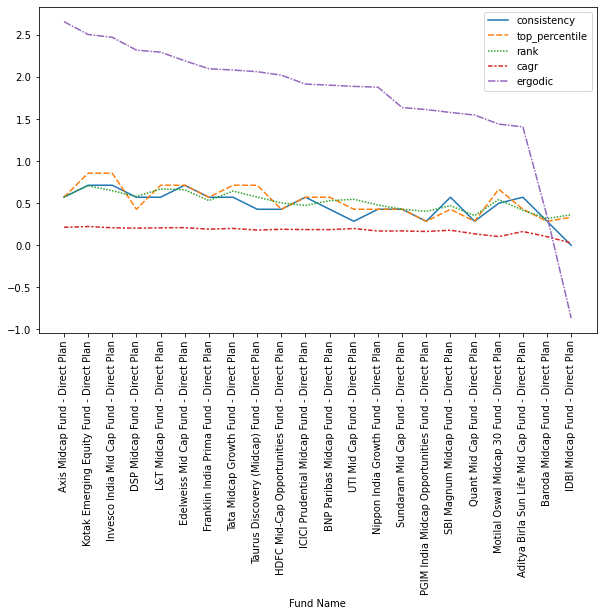

In [52]:
plt.figure(figsize=(10,6))
sns.lineplot(data=all_metrics.iloc[:, :5], sort=False)
# plt.xticks(np.arange(len(all_metrics)), [])
plt.xticks(rotation=90)
plt.show()

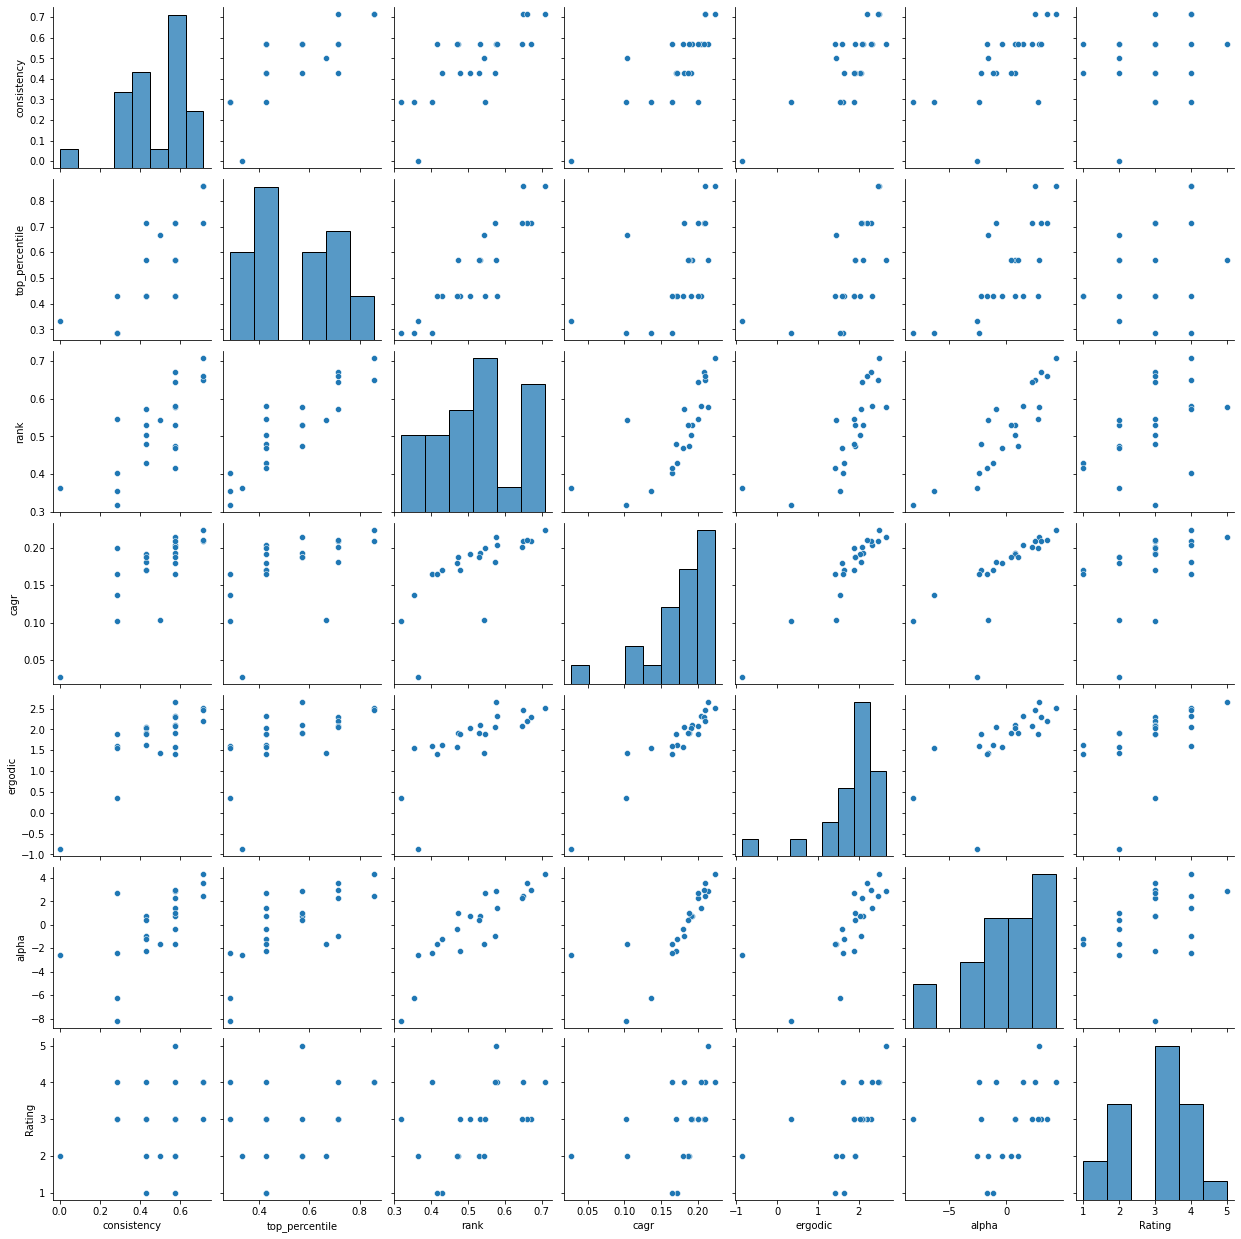

In [53]:
sns.pairplot(all_metrics)

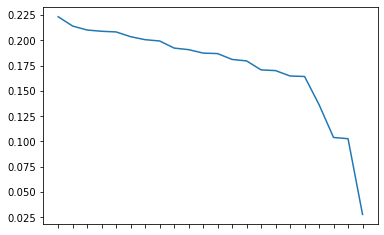

In [54]:
# dfdm.sum(axis=1).sort_values(ascending=False).plot()
plt.plot(cagr.sort_values(ascending=False))
plt.xticks(np.arange(len(dfdm)), [])
plt.show()

In [55]:
high = [2007,2009,2010,2012,2014,2017,2019,2020]
low = [2008,2011,2013,2015,2016,2018]
s1 = dfdr.loc[:, high[-4:]].mean(axis=1).rename('high')
s2 = dfdr.loc[:, low[-3:]].mean(axis=1).rename('low')
hl = pd.concat([s1, s2], axis=1)
hl['diff'] = hl['high'] - hl['low']
hl.sort_values('diff', ascending=False)

,high,low,diff
Fund Name,,,
Edelweiss Mid Cap Fund - Direct Plan,82.559524,44.011544,38.547980
Baroda Midcap Fund - Direct Plan,44.172078,15.295815,28.876263
Axis Midcap Fund - Direct Plan,70.086580,41.269841,28.816739
UTI Mid Cap Fund - Direct Plan,66.396104,39.177489,27.218615
Tata Midcap Growth Fund - Direct Plan,75.405844,50.072150,25.333694
PGIM India Midcap Opportunities Fund - Direct Plan,47.034632,31.385281,15.649351
BNP Paribas Midcap Fund - Direct Plan,59.664502,44.300144,15.364358
Invesco India Mid Cap Fund - Direct Plan,69.442641,58.874459,10.568182
Nippon India Growth Fund - Direct Plan,50.075758,45.021645,5.054113


A colorful plot to end.

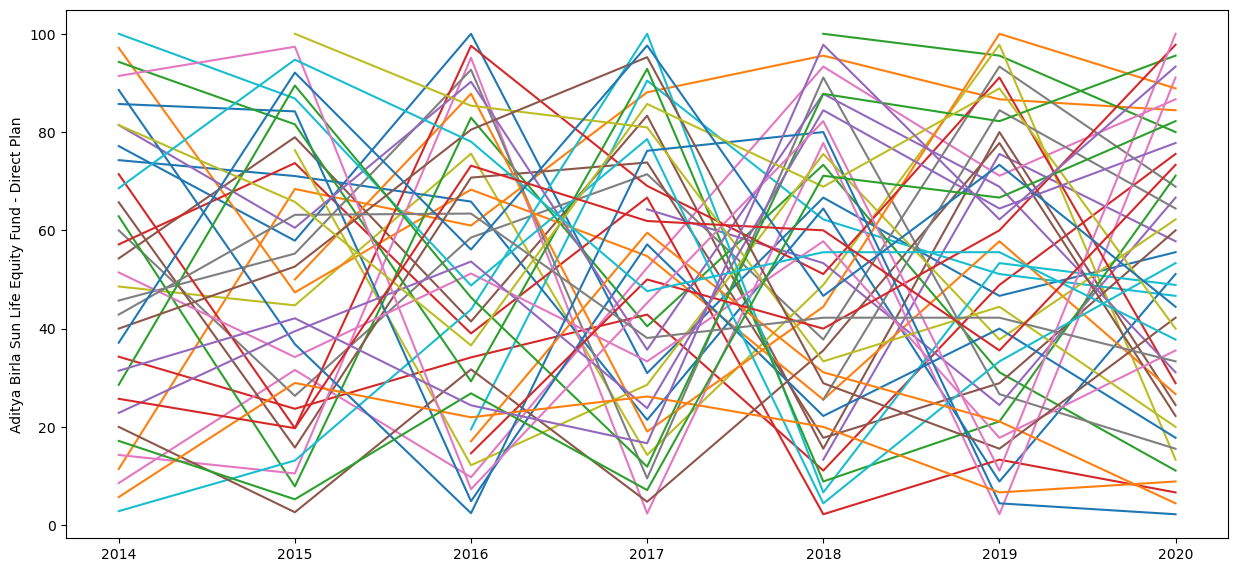

In [62]:
plt.figure(figsize=(15,7), dpi=100)
for index, row in dfdr.iloc[:, :-1].iterrows():
    sns.lineplot(data=row)